In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
file_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
data_house = pd.read_csv(file_path)
display(data_house.head())
print(data_house.columns)

file_path_test = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"
data_house_test = pd.read_csv(file_path_test)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data_house.drop("Id", axis=1, inplace = True)
data_house = data_house.drop_duplicates()

In [5]:
data_house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# Missing data analysis
missing_data = data_house.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data_house)) * 100
# Creating a table with percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_data[missing_data > 0],
    'Percentage (%)': missing_percentage[missing_data > 0],
})
pd.DataFrame(missing_df)
new_list = []
for i in missing_df.index.tolist():
    new_list.append(data_house[i].dtypes)
missing_df["Type"] = new_list
display(missing_df)
missing_list = [i for i in missing_df.index.tolist() if missing_df['Percentage (%)'][i] > 15]
missing_list

,Missing Values,Percentage (%),Type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
MasVnrType,872,59.726027,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object


['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage']

In [7]:
data_house.drop(missing_list,axis = 1, inplace = True)

Define the funtion to clean nan with rate > 15% and print the dropped columns

In [8]:
def df_clean_nan(df):
    df_nan_rate = df.isna().sum()/df.count()
    columns_list = df_nan_rate.index.tolist()
    columns_list = [i for i in columns_list if df_nan_rate[i] < 0.15]
    nan_list = [i for i in columns_list if df_nan_rate[i] > 0.15]
    print("The dropped columns are:" , nan_list)
    return df[columns_list]

In [9]:
list(set(data_house.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

The dropped columns are: []


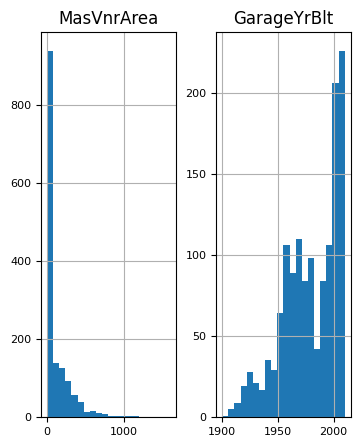

MasVnrArea      8
GarageYrBlt    81
dtype: int64
the above hists are columns with nan


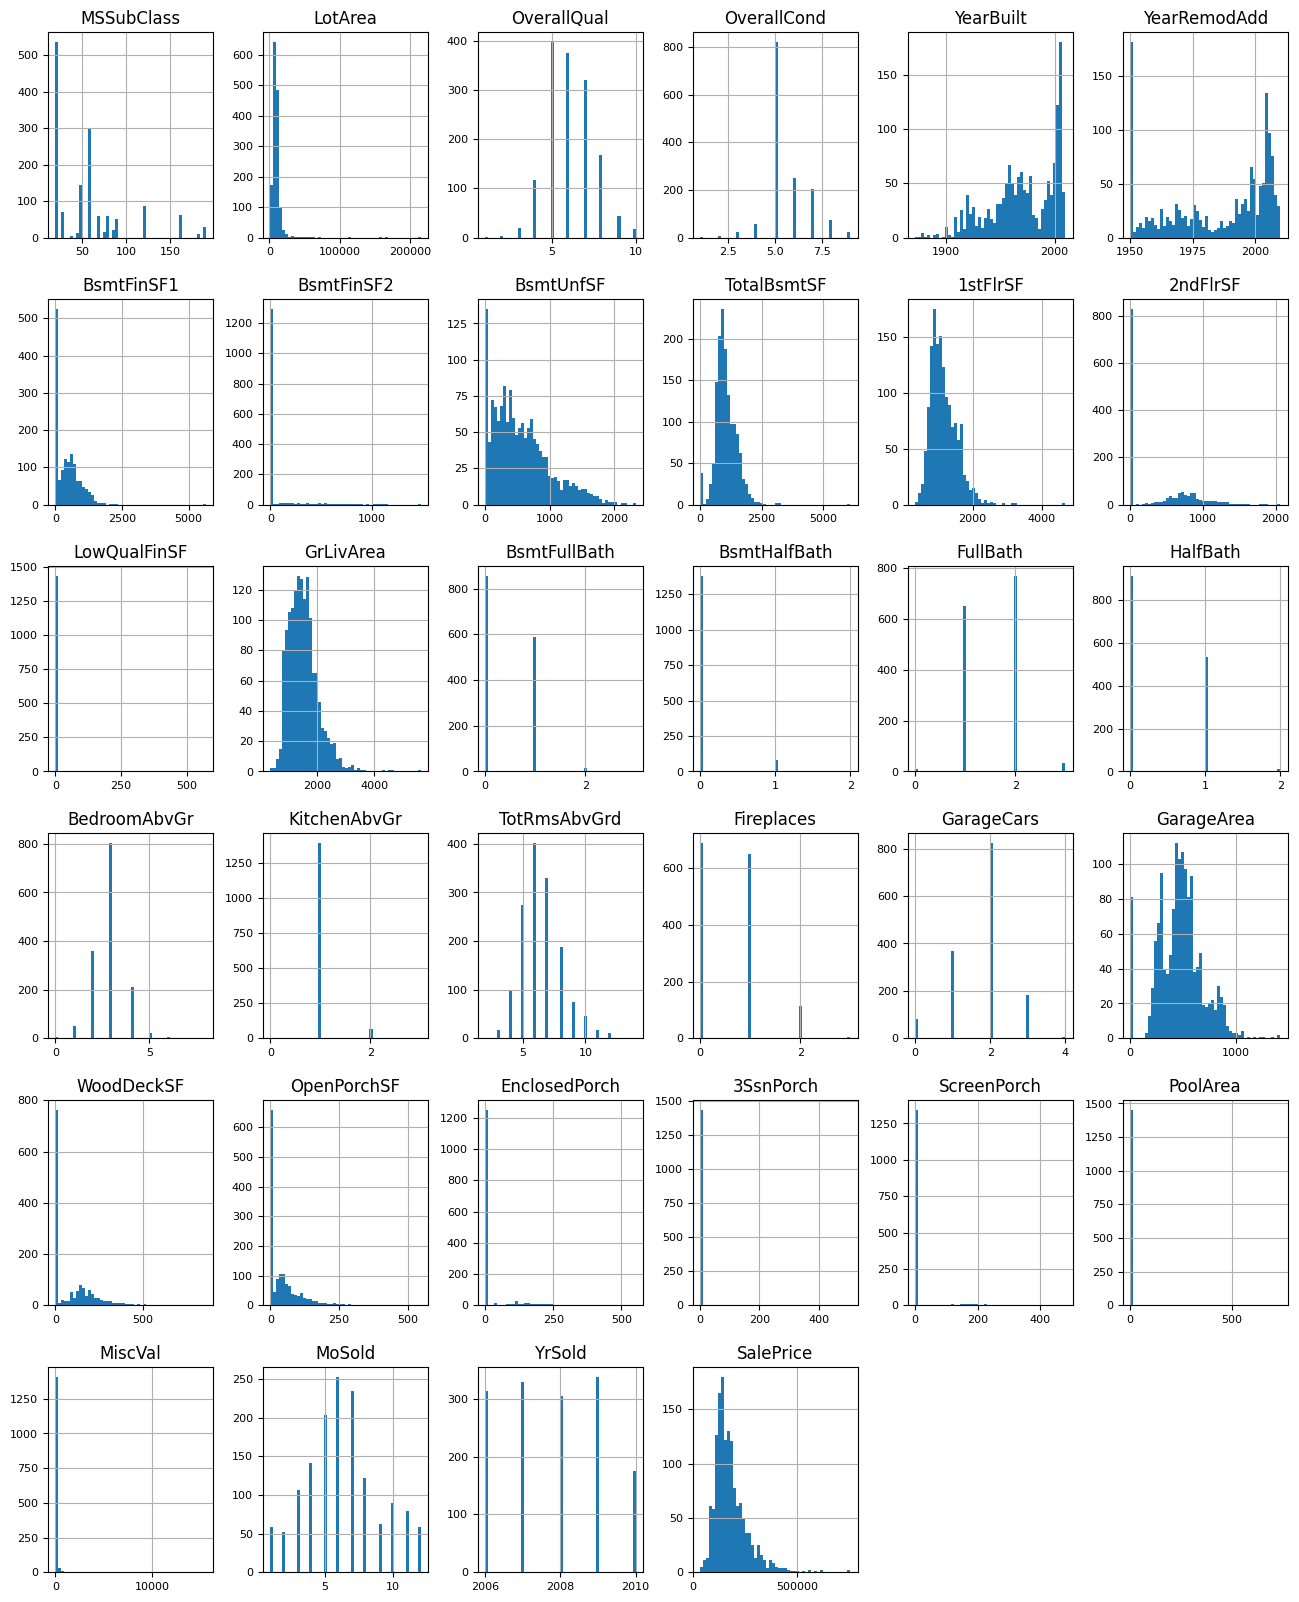

<Axes: >

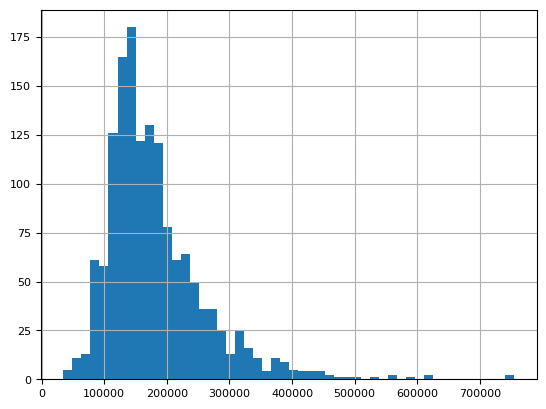

In [10]:
def df_num_hist(df,num_data_type):
    df_num = df.select_dtypes(include = num_data_type)
    df_num = df_clean_nan(df_num)
    df_num.head()
    global new_list
    new_list = [i for i in df_num.columns.tolist() if df_num[i].isna().sum()>0]
    df_num_nan = df_num[new_list]
    df_num_Nnan = df_num.drop(new_list,axis=1)
    # df_num_nan is the df contain nan
    df_num_nan.hist(figsize=(4, 5), bins=20, xlabelsize=8, ylabelsize=8);
    plt.show()
    print(df_num_nan.isna().sum())
    print("the above hists are columns with nan")
    df_num_Nnan.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
    plt.show()
    return new_list
df_num_hist(data_house,["int64","float64"])
data_house["SalePrice"].hist(bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
data_house.loc[ : , new_list] = data_house.loc[ : , new_list].replace([0,"nan"],data_house[new_list].mean().round(0))
print(data_house.loc[:,new_list])
data_house.loc[:,new_list].isna().sum()

      MasVnrArea  GarageYrBlt
0          196.0       2003.0
1          104.0       1976.0
2          162.0       2001.0
3          104.0       1998.0
4          350.0       2000.0
...          ...          ...
1455       104.0       1999.0
1456       119.0       1978.0
1457       104.0       1941.0
1458       104.0       1950.0
1459       104.0       1965.0

[1460 rows x 2 columns]


MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [59]:
# Find the unique value in df_str
def df_str_bar(df,str_data_type):
    global df_str
    global dict_unique_value
    global list_onehot_not
    df_str =  data_house.select_dtypes(include = str_data_type)
    df_str = df_clean_nan(df_str)
    dict_unique_value = {}
    list_onehot_not = []
    
    for i in list(df_str.columns):
        dict_unique_value[i] = list(df_str[i].unique())
        if len(dict_unique_value[i]) > 10:
            list_onehot_not.append(i)

    for i in list(df_str.columns):
        x = [str(i) for i in dict_unique_value[i]]
        print(x)
        y = list(df_str[i].value_counts(dropna=False))
        print(y)
        
        plt.bar(x,y)
        for i in range(len(y)):
            if x[i] == "nan":
                plt.bar(x[i], y[i], color='red') 
                plt.axvline(x=x[i],ls="-",c="red")
        plt.figure(figsize=(18, 5))
        plt.show()
    print(dict_unique_value)
    print("the list for columns not suitable for one-hot encoding is list_onehot_not: ", list_onehot_not)

def not_one_hot_encoding():
    
    df = pd.DataFrame()
    for i in list_onehot_not:
        dict_not_one_hot = {}
        dict_not_one_hot[i] = dict_unique_value[i]
        additional_cols = pd.DataFrame(dict_not_one_hot)
        df = pd.concat([df, additional_cols], axis=1)

    print(df.count().sum())
    print(df.fillna(0))

The dropped columns are: []
['RL', 'RM', 'C (all)', 'FV', 'RH']
[1151, 218, 65, 16, 10]


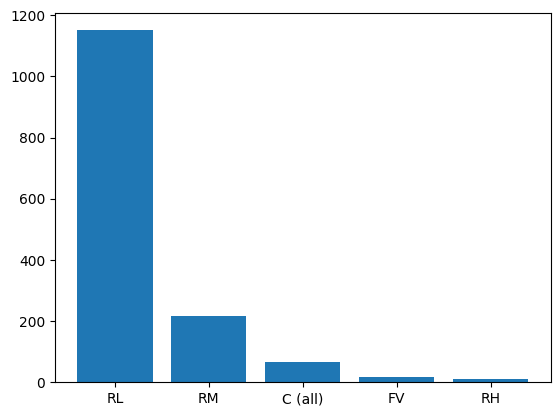

<Figure size 1800x500 with 0 Axes>

['Pave', 'Grvl']
[1454, 6]


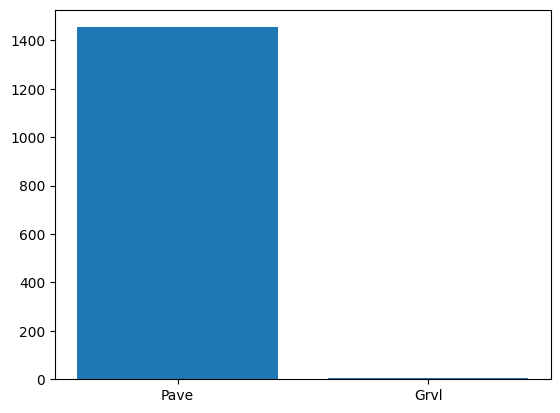

<Figure size 1800x500 with 0 Axes>

['Reg', 'IR1', 'IR2', 'IR3']
[925, 484, 41, 10]


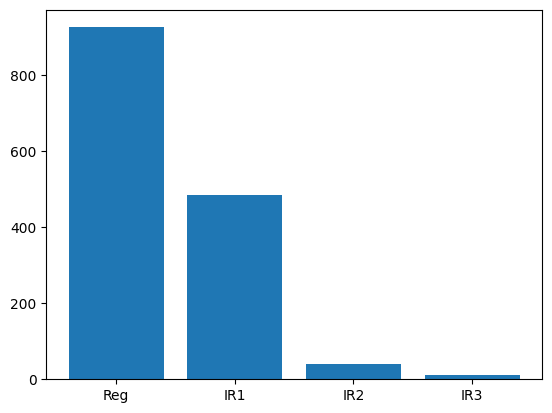

<Figure size 1800x500 with 0 Axes>

['Lvl', 'Bnk', 'Low', 'HLS']
[1311, 63, 50, 36]


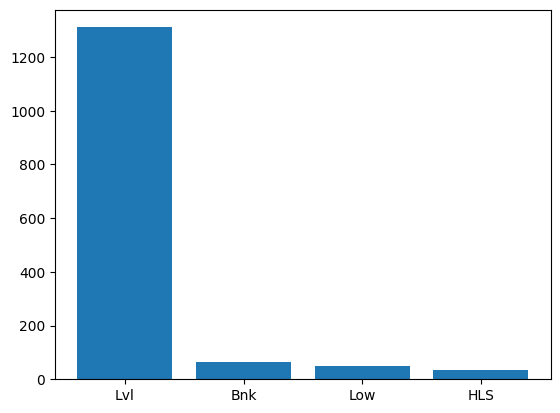

<Figure size 1800x500 with 0 Axes>

['AllPub', 'NoSeWa']
[1459, 1]


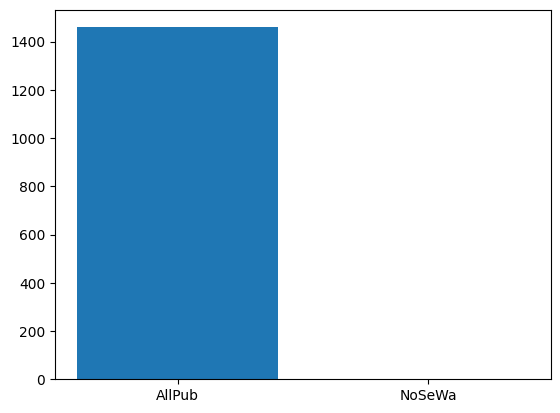

<Figure size 1800x500 with 0 Axes>

['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
[1052, 263, 94, 47, 4]


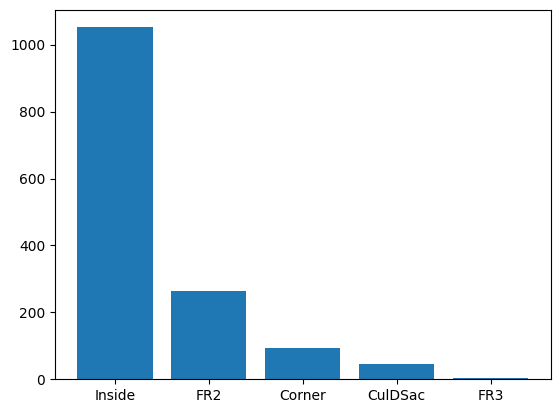

<Figure size 1800x500 with 0 Axes>

['Gtl', 'Mod', 'Sev']
[1382, 65, 13]


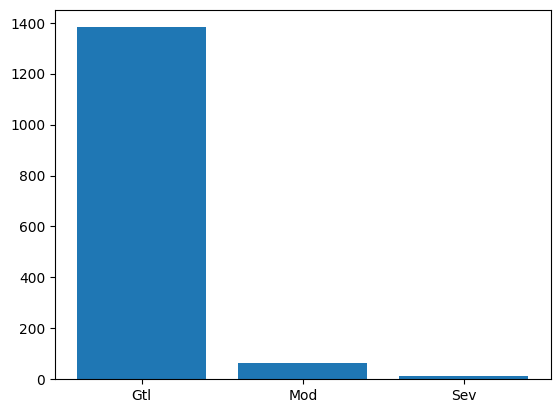

<Figure size 1800x500 with 0 Axes>

['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
[225, 150, 113, 100, 86, 79, 77, 74, 73, 59, 58, 51, 49, 41, 38, 37, 28, 25, 25, 17, 17, 16, 11, 9, 2]


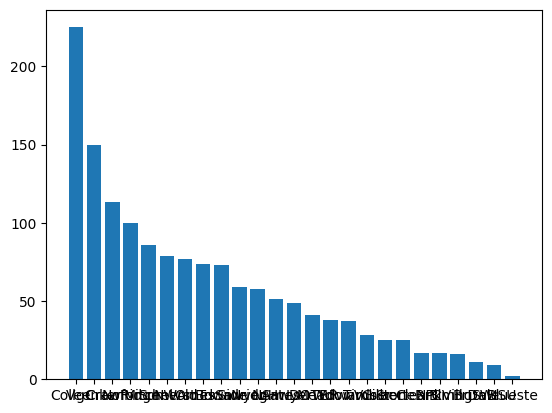

<Figure size 1800x500 with 0 Axes>

['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
[1260, 81, 48, 26, 19, 11, 8, 5, 2]


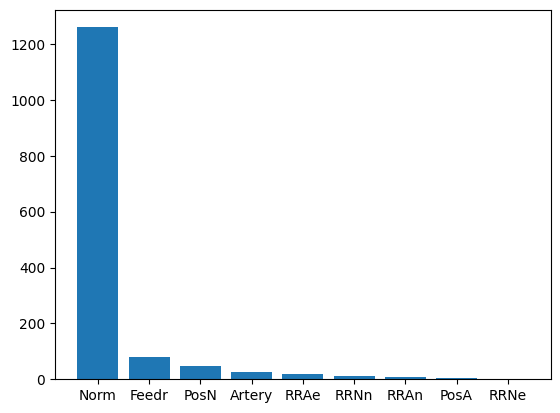

<Figure size 1800x500 with 0 Axes>

['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
[1445, 6, 2, 2, 2, 1, 1, 1]


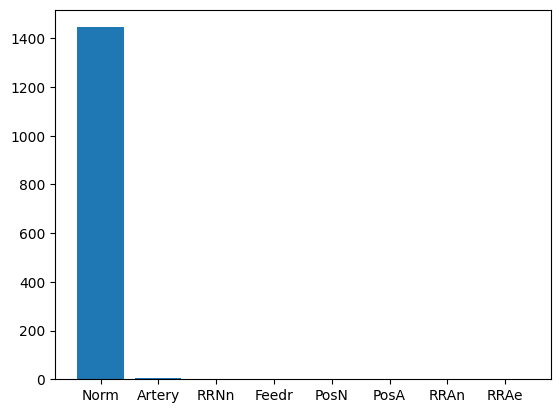

<Figure size 1800x500 with 0 Axes>

['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
[1220, 114, 52, 43, 31]


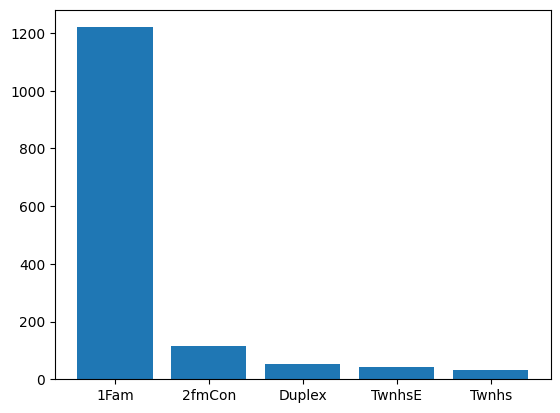

<Figure size 1800x500 with 0 Axes>

['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
[726, 445, 154, 65, 37, 14, 11, 8]


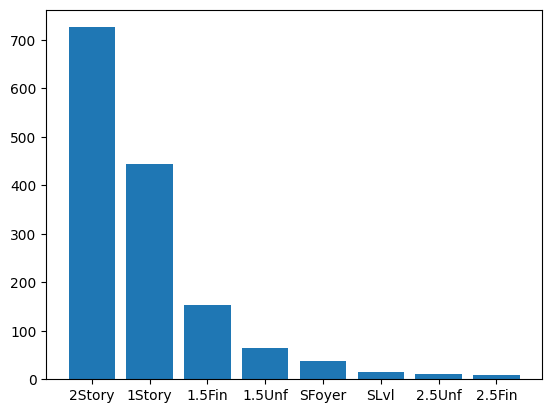

<Figure size 1800x500 with 0 Axes>

['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
[1141, 286, 13, 11, 7, 2]


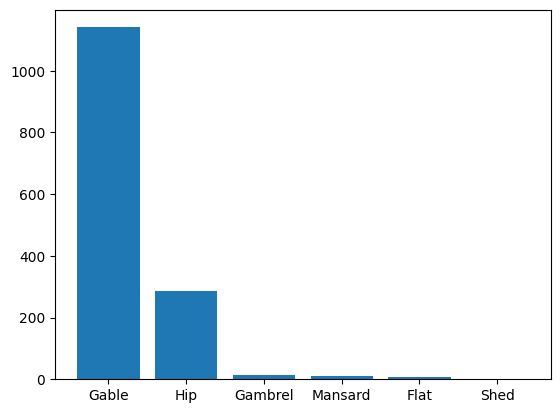

<Figure size 1800x500 with 0 Axes>

['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile']
[1434, 11, 6, 5, 1, 1, 1, 1]


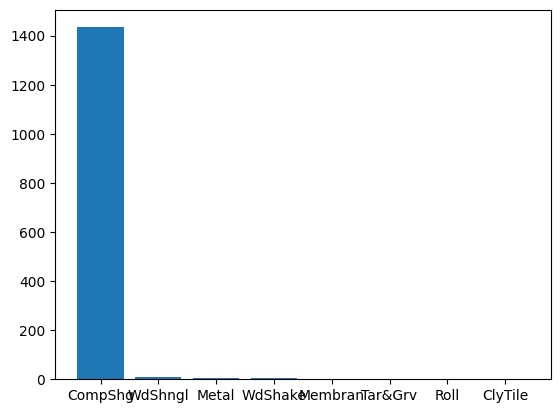

<Figure size 1800x500 with 0 Axes>

['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock']
[515, 222, 220, 206, 108, 61, 50, 26, 25, 20, 2, 2, 1, 1, 1]


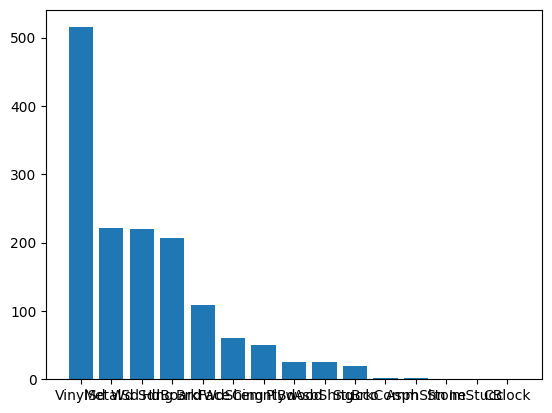

<Figure size 1800x500 with 0 Axes>

['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock']
[504, 214, 207, 197, 142, 60, 38, 26, 25, 20, 10, 7, 5, 3, 1, 1]


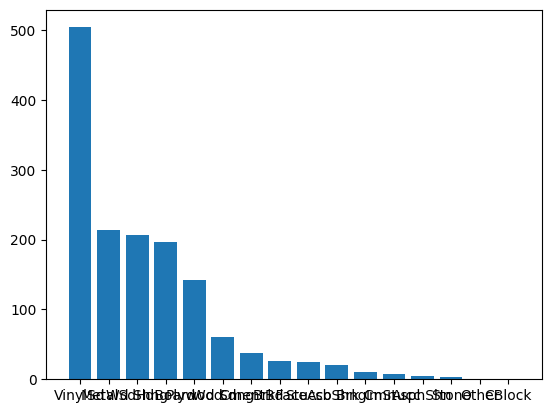

<Figure size 1800x500 with 0 Axes>

['Gd', 'TA', 'Ex', 'Fa']
[906, 488, 52, 14]


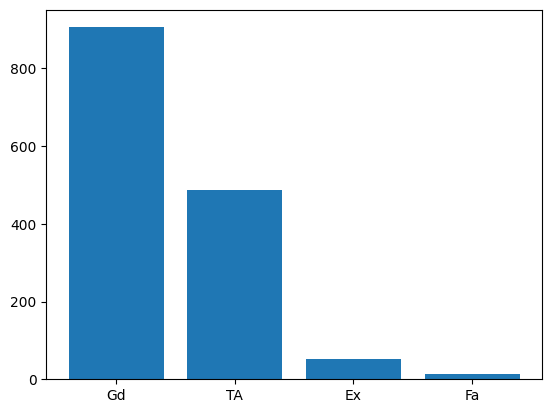

<Figure size 1800x500 with 0 Axes>

['TA', 'Gd', 'Fa', 'Po', 'Ex']
[1282, 146, 28, 3, 1]


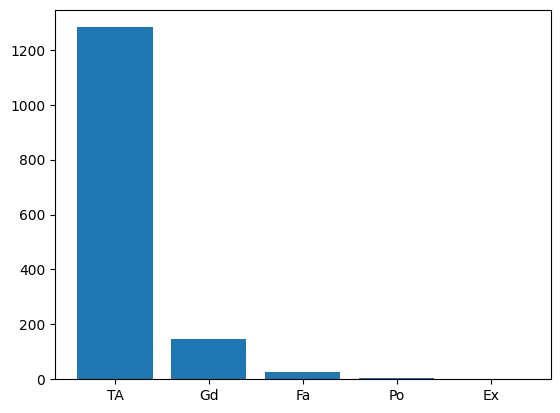

<Figure size 1800x500 with 0 Axes>

['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']
[647, 634, 146, 24, 6, 3]


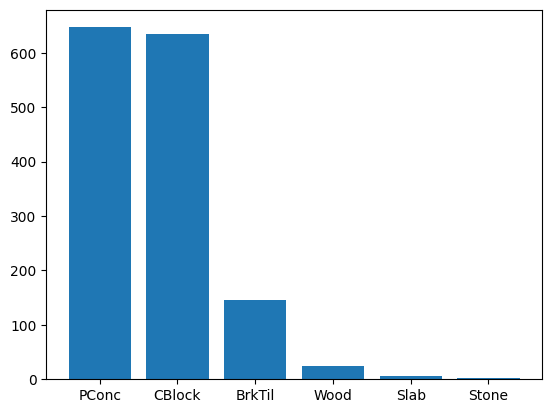

<Figure size 1800x500 with 0 Axes>

['Gd', 'TA', 'Ex', 'nan', 'Fa']
[649, 618, 121, 37, 35]


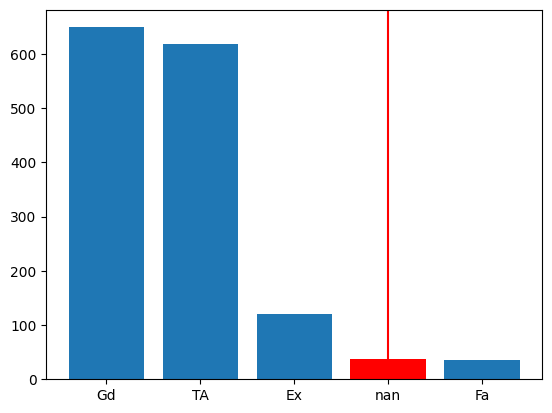

<Figure size 1800x500 with 0 Axes>

['TA', 'Gd', 'nan', 'Fa', 'Po']
[1311, 65, 45, 37, 2]


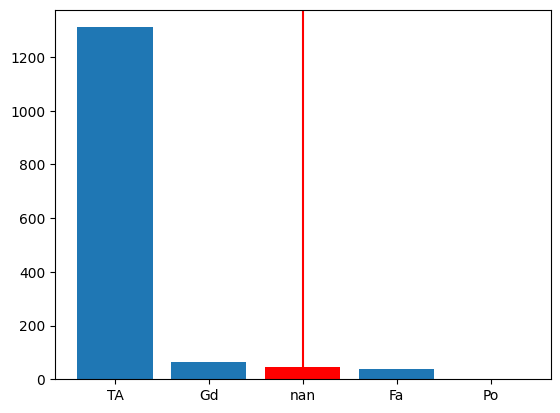

<Figure size 1800x500 with 0 Axes>

['No', 'Gd', 'Mn', 'Av', 'nan']
[953, 221, 134, 114, 38]


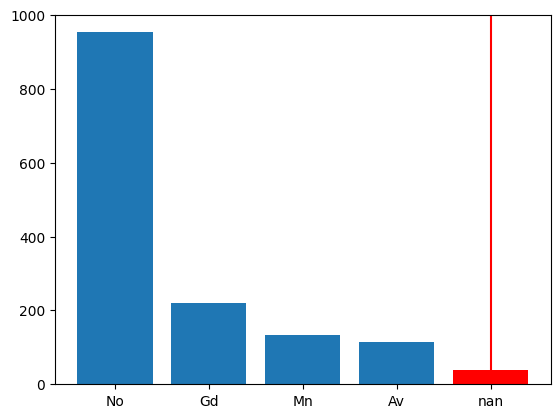

<Figure size 1800x500 with 0 Axes>

['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'nan', 'LwQ']
[430, 418, 220, 148, 133, 74, 37]


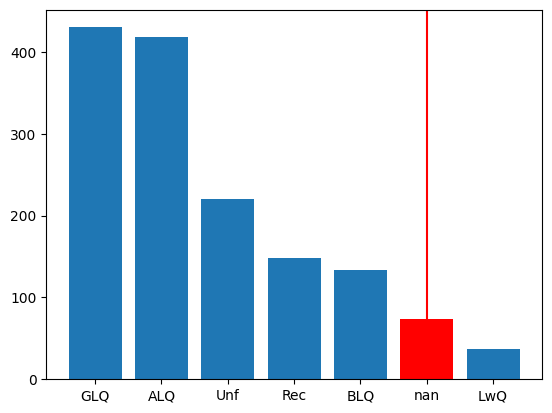

<Figure size 1800x500 with 0 Axes>

['Unf', 'BLQ', 'nan', 'ALQ', 'Rec', 'LwQ', 'GLQ']
[1256, 54, 46, 38, 33, 19, 14]


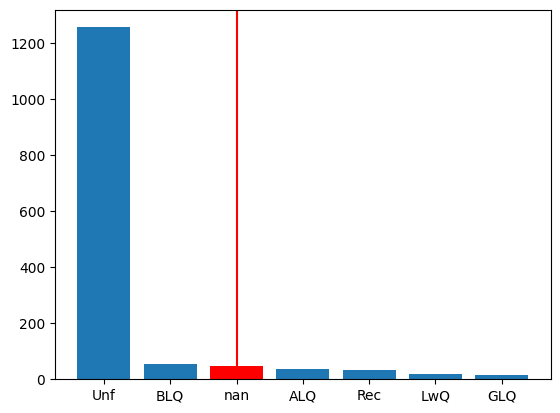

<Figure size 1800x500 with 0 Axes>

['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor']
[1428, 18, 7, 4, 2, 1]


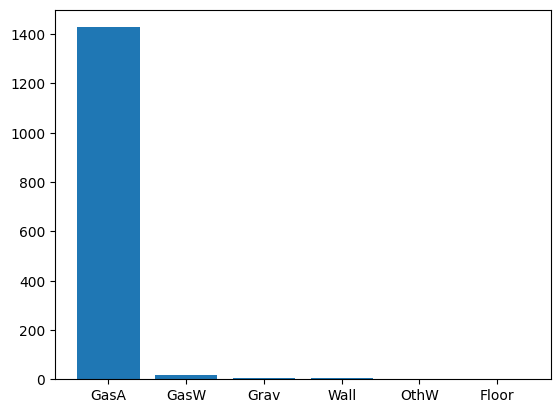

<Figure size 1800x500 with 0 Axes>

['Ex', 'Gd', 'TA', 'Fa', 'Po']
[741, 428, 241, 49, 1]


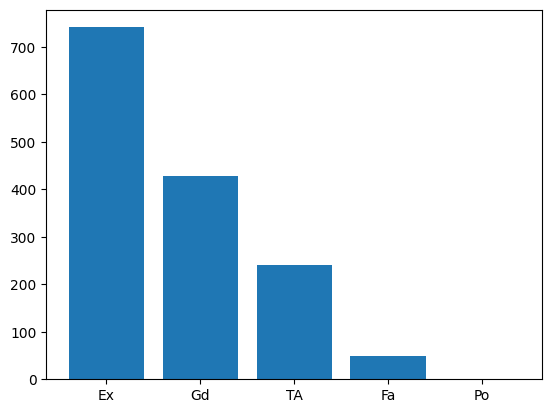

<Figure size 1800x500 with 0 Axes>

['Y', 'N']
[1365, 95]


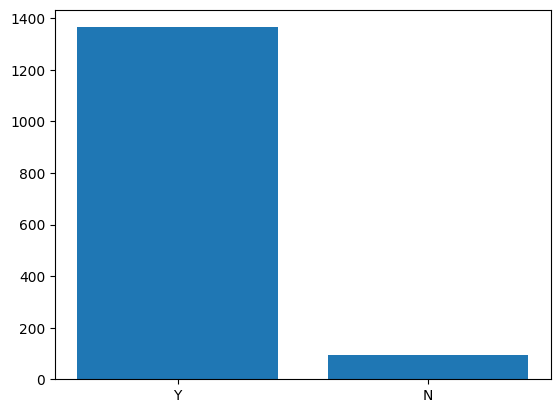

<Figure size 1800x500 with 0 Axes>

['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'nan']
[1334, 94, 27, 3, 1, 1]


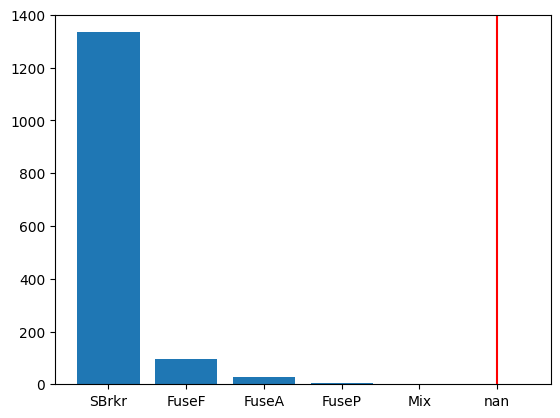

<Figure size 1800x500 with 0 Axes>

['Gd', 'TA', 'Ex', 'Fa']
[735, 586, 100, 39]


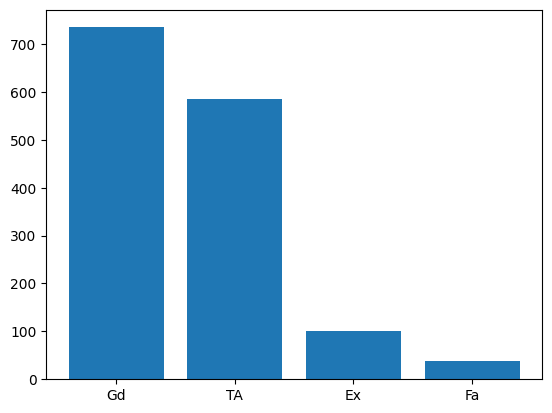

<Figure size 1800x500 with 0 Axes>

['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']
[1360, 34, 31, 15, 14, 5, 1]


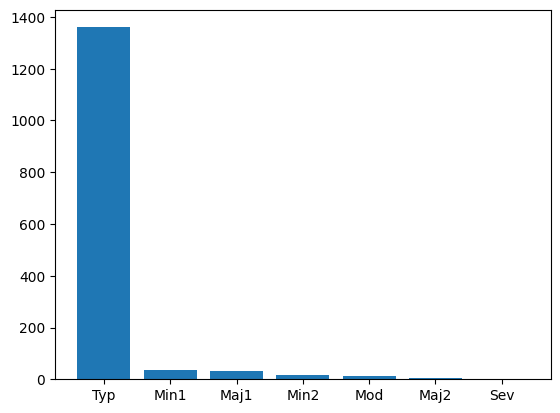

<Figure size 1800x500 with 0 Axes>

['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'nan', 'Basment', '2Types']
[870, 387, 88, 81, 19, 9, 6]


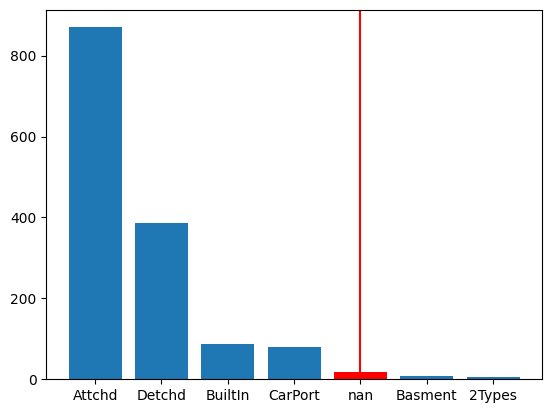

<Figure size 1800x500 with 0 Axes>

['RFn', 'Unf', 'Fin', 'nan']
[605, 422, 352, 81]


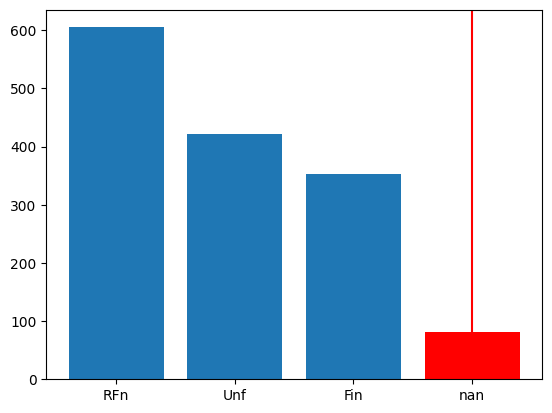

<Figure size 1800x500 with 0 Axes>

['TA', 'Fa', 'Gd', 'nan', 'Ex', 'Po']
[1311, 81, 48, 14, 3, 3]


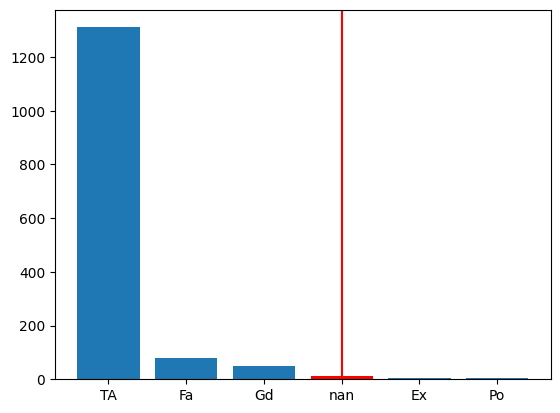

<Figure size 1800x500 with 0 Axes>

['TA', 'Fa', 'nan', 'Gd', 'Po', 'Ex']
[1326, 81, 35, 9, 7, 2]


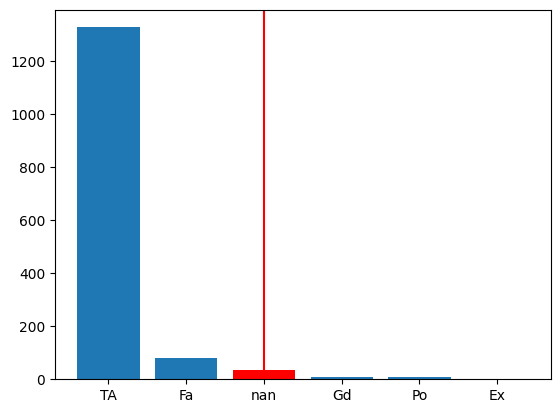

<Figure size 1800x500 with 0 Axes>

['Y', 'N', 'P']
[1340, 90, 30]


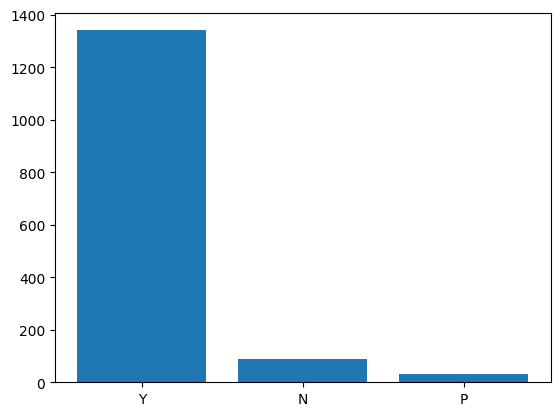

<Figure size 1800x500 with 0 Axes>

['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']
[1267, 122, 43, 9, 5, 5, 4, 3, 2]


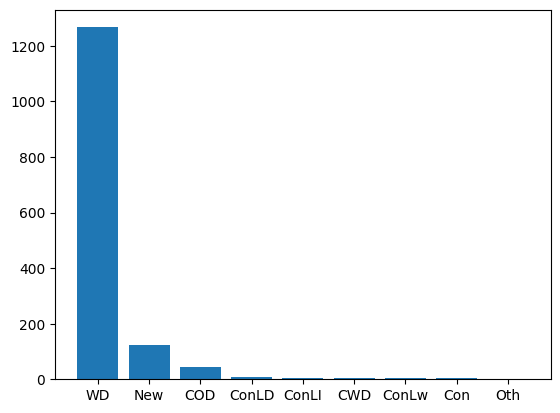

<Figure size 1800x500 with 0 Axes>

['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']
[1198, 125, 101, 20, 12, 4]


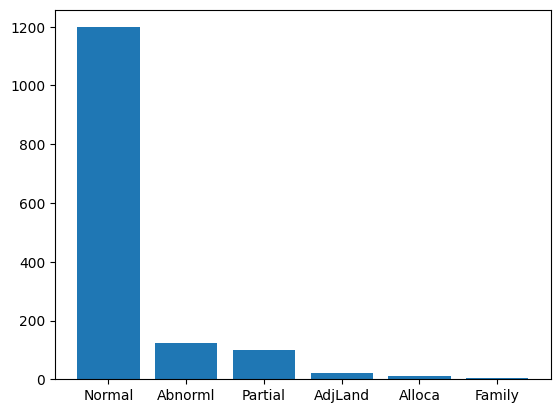

<Figure size 1800x500 with 0 Axes>

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'], 'Street': ['Pave', 'Grvl'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'], 'Utilities': ['AllPub', 'NoSeWa'], 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'], 'Condition1': ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], 'Condition2': ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], 'HouseStyle': ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'], 'RoofStyle': ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], 'RoofMatl': ['CompShg'

In [60]:
df_str_bar(data_house,"O")

In [69]:
print(list_onehot_not)
not_one_hot_encoding()

['Neighborhood', 'Exterior1st', 'Exterior2nd']
56
   Neighborhood Exterior1st Exterior2nd
0       CollgCr     VinylSd     VinylSd
1       Veenker     MetalSd     MetalSd
2       Crawfor     Wd Sdng     Wd Shng
3       NoRidge     HdBoard     HdBoard
4       Mitchel     BrkFace     Plywood
5       Somerst     WdShing     Wd Sdng
6        NWAmes     CemntBd     CmentBd
7       OldTown     Plywood     BrkFace
8       BrkSide     AsbShng      Stucco
9        Sawyer      Stucco     AsbShng
10      NridgHt     BrkComm     Brk Cmn
11        NAmes     AsphShn     ImStucc
12      SawyerW       Stone     AsphShn
13       IDOTRR     ImStucc       Stone
14      MeadowV      CBlock       Other
15      Edwards           0      CBlock
16       Timber           0           0
17      Gilbert           0           0
18      StoneBr           0           0
19      ClearCr           0           0
20      NPkVill           0           0
21      Blmngtn           0           0
22       BrDale           0   

In [70]:
label_encoding_dict = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandContour': ['Low', 'Bnk', 'HLS', 'Lvl'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd'],
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageFinish': ['Unf', 'RFn', 'Fin'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y']
}
label_encoding_list = list(label_encoding_dict.keys())

In [28]:
#get the lists of columns with nan in df_str
str_nan_list = []
for i in list(df_str.columns):
    if df_str[i].isna().sum() > 0:
        str_nan_list.append(i)
df_str[str_nan_list].isna().sum()

MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [55]:
val_y = data_house["SalePrice"]
val_X = data_house.drop("SalePrice",axis = 1)
display(val_X.head())
display(val_y.head())
print(val_X.loc[0,"PoolQC"]
type(val_X.loc[0,"PoolQC"]))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

nan <class 'float'>
